In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [11]:
# Import dataset
dataset = pd.read_csv('training.csv', delimiter='\t')
dataset = dataset.dropna(subset=["Temperature"])
dataset = dataset.reset_index(drop=True)
training_set = dataset.iloc[:, 1:2].values

In [12]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Preparing the training data
x_train = []
y_train = []
n_future = 4  # Forecast next 4 days temperature
n_past = 30   # Use past 30 days
for i in range(n_past, len(training_set_scaled) - n_future + 1):
    x_train.append(training_set_scaled[i - n_past:i, 0])
    y_train.append(training_set_scaled[i:i + n_future, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
# Building the model
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape=(x_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=n_future, activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
regressor.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
95/95 [==============================] - 7s 22ms/step - loss: 0.0363 - acc: 0.2363
Epoch 2/50
95/95 [==============================] - 2s 21ms/step - loss: 0.0147 - acc: 0.2433
Epoch 3/50
95/95 [==============================] - 2s 21ms/step - loss: 0.0127 - acc: 0.2439
Epoch 4/50
95/95 [==============================] - 2s 20ms/step - loss: 0.0117 - acc: 0.2604
Epoch 5/50
95/95 [==============================] - 2s 20ms/step - loss: 0.0108 - acc: 0.2512
Epoch 6/50
95/95 [==============================] - 2s 21ms/step - loss: 0.0102 - acc: 0.2505
Epoch 7/50
95/95 [==============================] - 2s 25ms/step - loss: 0.0096 - acc: 0.2551
Epoch 8/50
95/95 [==============================] - 2s 23ms/step - loss: 0.0093 - acc: 0.2393: 0s - loss: 0.0092 - acc: 0.23
Epoch 9/50
95/95 [==============================] - 2s 24ms/step - loss: 0.0089 - acc: 0.2732: 1s 
Epoch 10/50
95/95 [==============================] - 2s 23ms/step - loss: 0.0085 - acc: 0.2488
Epoch 11/50
95/95 [====

In [14]:
# Prepare test dataset
test_dataset = pd.read_csv('testing.csv').iloc[:30, 1:2].values
test_dataset = sc.transform(test_dataset)
test_dataset = np.reshape(test_dataset, (1, test_dataset.shape[0], 1))

predicted_temperature = regressor.predict(test_dataset)
predicted_temperature = sc.inverse_transform(predicted_temperature.reshape(-1, 1))

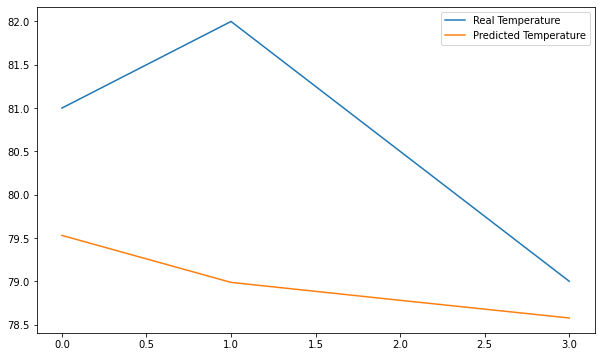

In [15]:
# Plotting
real_temperature = pd.read_csv('_testing.csv').iloc[30:34, 1].values  # Assuming there are only 4 future real values
plt.figure(figsize=(10, 6))
plt.plot(real_temperature, label='Real Temperature')
plt.plot(predicted_temperature, label='Predicted Temperature')
plt.legend()
plt.show()